## モザイク処理
https://stackoverflow.com/questions/30917753/subsetting-a-2d-numpy-array

In [42]:
from PIL import Image, ImageOps
import numpy as np

import matplotlib.pyplot as plt

In [43]:
im1 = Image.open("./data/anise-2785512_1920.jpg")
im1.size

(1920, 1280)

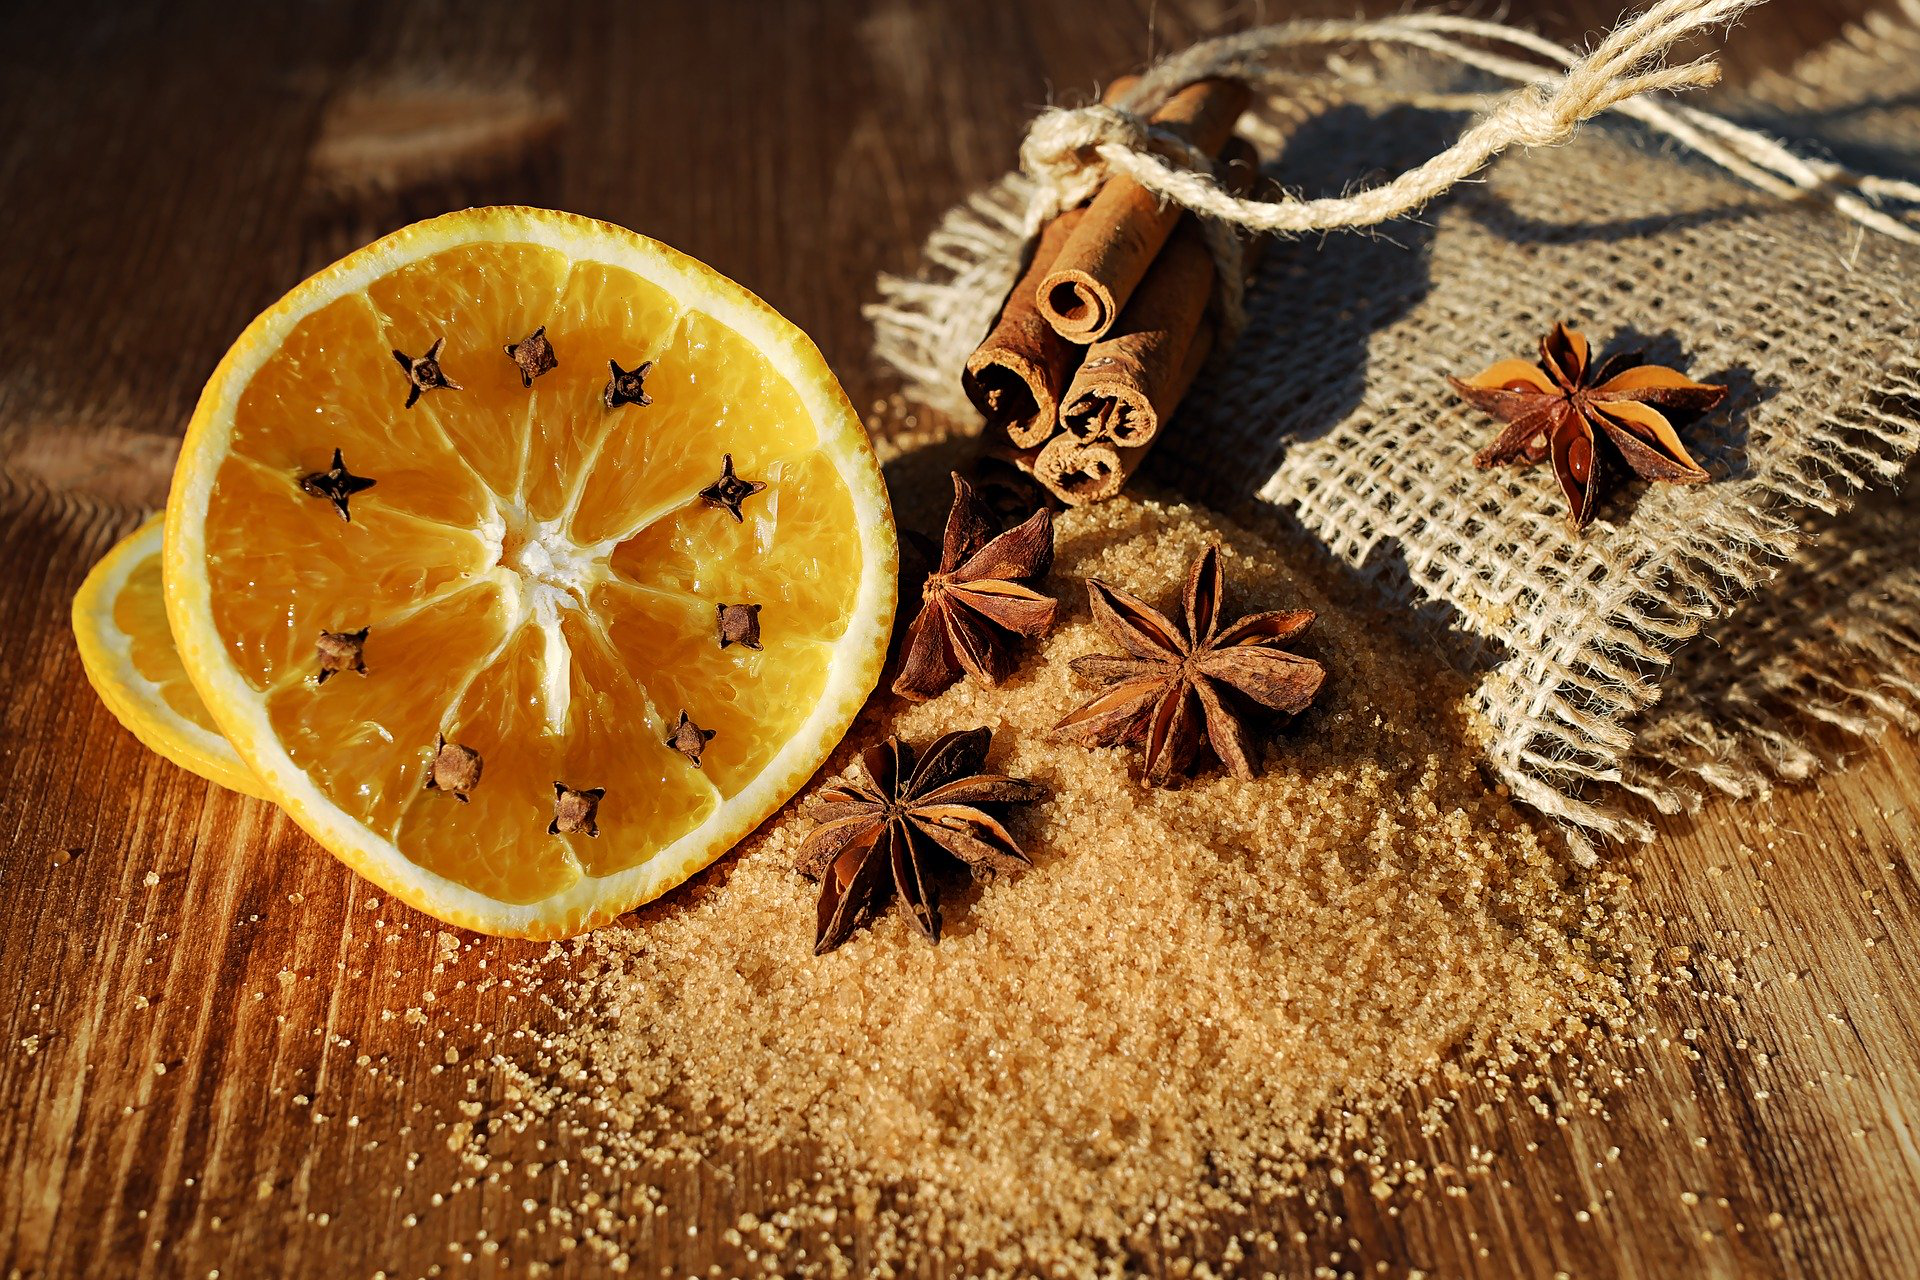

In [44]:
im1

In [45]:
image_size = im1.size
image_size

(1920, 1280)

In [80]:
crop_images = []
for idy in range(3):
    tmp = []
    for idx in range(3):
        tmp.append(im1.crop((image_size[0]/3*idx, image_size[1]/3*idy, image_size[0]/3*(idx+1), image_size[1]/3*(idy+1))))
    crop_images.append(tmp)

In [81]:
for i in range(9):
    idx = np.random.randint(0, 3)
    idy = np.random.randint(0, 3)
    crop_images[idy][idx] = ImageOps.mirror(crop_images[idy][idx])
    tmp = []
    for _im in crop_images:
        tmp.append(np.concatenate(_im, axis=1))
    im2 = np.concatenate(tmp)
    Image.fromarray(im2).save(f'mosaic_image{i}.jpg', format="JPEG")

In [85]:
tmp = []
for i in range(9):
    tmp.append(Image.open(f'mosaic_image{i}.jpg'))

In [88]:
tmp[0].save('mosaic_image.gif', save_all=True, append_images=tmp[1:], duration=30*100, loop=1)